# **Assignment 4: Ensemble in Classification Supervised Learning**

Cardiovascular disease (CVD) is a broad term encompassing various conditions affecting the heart and blood vessels, including coronary artery disease, heart attacks, stroke, and hypertension. It remains the leading cause of death worldwide, accounting for approximately 17.9 million deaths annually, according to the World Health Organization (WHO). Many risk factors contribute to CVD, including lifestyle choices (smoking, poor diet, lack of exercise), genetic predisposition, and underlying medical conditions like diabetes and high blood pressure.

Despite advances in medical science, early detection remains a significant challenge. Traditional diagnostic methods, such as electrocardiograms (ECGs), blood tests, and imaging techniques, often detect CVD at later stages when symptoms become apparent. However, preventive care and early intervention are critical in reducing morbidity and mortality rates.

With the emergence of big data in healthcare, predictive analytics using machine learning (ML) and artificial intelligence (AI) has become a promising approach to identifying individuals at risk of developing CVD. By analyzing large-scale patient data, AI can detect hidden patterns and predict the likelihood of disease onset before traditional symptoms appear. This technology holds immense potential for preventive healthcare, improving patient outcomes while reducing the financial burden on healthcare systems.



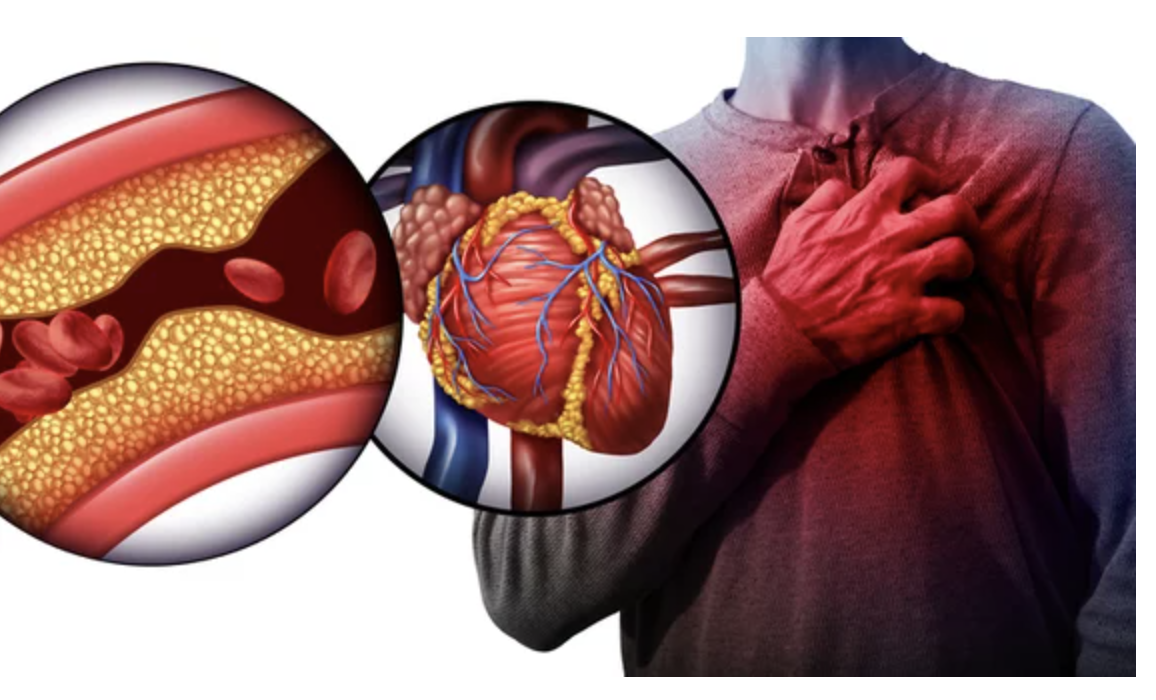

# **Dataset Description**

The dataset consists of three types of input features—Objective, Examination, and Subjective—which provide comprehensive patient information. These features help in predicting the presence or absence of cardiovascular disease (CVD) as a binary target variable (cardio: 0 = No CVD, 1 = CVD present).

# **List of Features**

The list of features are as follows:

1) Age

2) Height

3) Weight

4) Gender

5) Systolic blood pressure

6) Diastolic blood pressure

7) Cholesterol

8) Glucose

9) Smoking

10) Alcohol intake

11) Physical activity

12) Presence or absence of cardiovascular disease

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import time, sys


from pandas.api.types import CategoricalDtype
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OrdinalEncoder
from sklearn.decomposition import PCA


from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

from sklearn.pipeline import Pipeline
from sklearn.feature_selection import mutual_info_classif
from boruta import BorutaPy


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier,
    ExtraTreesClassifier,
    VotingClassifier
)
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


from sklearn.model_selection import (
    train_test_split,
    StratifiedKFold,
    cross_val_score,
    GridSearchCV
)
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report,
    ConfusionMatrixDisplay,
    brier_score_loss
)
from turtle import clone

from sklearn.calibration import CalibratedClassifierCV, calibration_curve


# **Question 1_Classification**

Using Python coding, read the file. Present number of the samples, number of the samples for each class, type of features.

In [4]:
# Load dataset
df_raw = pd.read_csv("cardio_Heart.csv")

#copy to avoid editing raw
df = df_raw.copy()

# getting info on shape
print("Shape:", df.shape)


Shape: (70000, 1)


In [5]:
#preview first 5 rows
display(df.head(5))

#preview last 5 rows
display(df.tail(5))

,id;age;gender;height;weight;ap_hi;ap_lo;cholesterol;gluc;smoke;alco;active;cardio
0,0;18393;2;168;62.0;110;80;1;1;0;0;1;0
1,1;20228;1;156;85.0;140;90;3;1;0;0;1;1
2,2;18857;1;165;64.0;130;70;3;1;0;0;0;1
3,3;17623;2;169;82.0;150;100;1;1;0;0;1;1
4,4;17474;1;156;56.0;100;60;1;1;0;0;0;0


,id;age;gender;height;weight;ap_hi;ap_lo;cholesterol;gluc;smoke;alco;active;cardio
69995,99993;19240;2;168;76.0;120;80;1;1;1;0;1;0
69996,99995;22601;1;158;126.0;140;90;2;2;0;0;1;1
69997,99996;19066;2;183;105.0;180;90;3;1;0;1;0;1
69998,99998;22431;1;163;72.0;135;80;1;2;0;0;0;1
69999,99999;20540;1;170;72.0;120;80;2;1;0;0;1;0


The data here is seperated using ";" so we need to factor that in while moving forward. 

In [6]:
#adding a argument which handles ";" seperated data
df_seperated = pd.read_csv("cardio_Heart.csv",sep=";")

df = df_seperated.copy()

# getting info on shape
print("Shape:", df.shape)

Shape: (70000, 13)


In [7]:
#preview first 5 rows
display(df.head(5))

#preview last 5 rows
display(df.tail(5))

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1
69999,99999,20540,1,170,72.0,120,80,2,1,0,0,1,0


In [8]:
#data types and null check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


*Analysis and Discussion*

The data was ";" seperated which I handled and I can confirm there are 12 features and analysed their basic info which will help moving forward in the data preprocesinng step. ?

# **Question 2_Classification**

The second step is data pre-processing, which is the goal  is to ensure that the dataset is structured, clean, and ready for effective analysis.

to understand the quality of the data, two investigations are needed.

1) Duplicated Removal and Missing Data Imputation


2) Outlier Removal

Provide possible solutions to these investigations, and briefly discuss the potential techniques.

In [9]:
#missing values overview
missing_summary = (
    df.isnull().sum()
      .to_frame("missing_count")
      .assign(missing_pct=lambda x: (100*x["missing_count"]/len(df)).round(2))
      .query("missing_count > 0")
      .sort_values("missing_count", ascending=False)
)

display(missing_summary if not missing_summary.empty else "No missing values detected")


'No missing values detected'

In [10]:
# row duplicates
dup_rows = df.duplicated().sum()
print(f"Duplicate rows: {dup_rows}")

Duplicate rows: 0


We updated the integer-handling logic in this version to also check the numeric range of values—so that integer features with wide, continuous ranges (like height, weight, or blood pressure) are correctly classified as Continuous rather than Discrete; the earlier version was flawed because it relied only on the count of unique values, causing continuous integer variables with limited distinct entries to be misclassified.

In [11]:
# Discrete vs Continuous

# object / bool => Discrete
# integers => could be either Discrete (if few unique values) or Continuous
# floats => Continuous

# defining "few unique values"
# optA: fixed threshold like <=20 unique values
# optB: relative threshold like <=5% of total rows

# using a mix: max(20, 5% of rows) in such a way it scales with dataset size.
from pandas import CategoricalDtype
n_rows, n_cols = df.shape


def feature_type(series: pd.Series, n_samples: int) -> str:
    if series.dtype == "bool":
        return "Discrete"
    if series.dtype == "object":
        return "Discrete"
    if isinstance(series.dtype, CategoricalDtype):   
        return "Discrete"
    if pd.api.types.is_integer_dtype(series):
        unique_vals = series.nunique(dropna=True)
        value_range = series.max() - series.min()

        absolute_cap = 20
        relative_cap = max(5, int(0.05 * n_samples))  # avoids tiny thresholds
        # heuristic:
        # If unique count small OR range small → discrete (e.g. 1-5 ratings)
        # If wide numeric range → continuous (e.g. 50-200 height)
        if unique_vals <= max(absolute_cap, relative_cap) and value_range < 50:
            return "Discrete"
        else:
            return "Continuous"
        # return "Discrete" if unique_vals <= max(absolute_cap, relative_cap) else "Continuous"
    if pd.api.types.is_float_dtype(series):
        return "Continuous"
    return "Unknown"   # fallback, safety check

# applying it for all features
feature_types = {col: feature_type(df[col], n_rows) for col in df.columns}

print("\nFeature classification:")
for k, v in feature_types.items():
    print(f" - {k}: {v}")


Feature classification:
 - id: Continuous
 - age: Continuous
 - gender: Discrete
 - height: Continuous
 - weight: Continuous
 - ap_hi: Continuous
 - ap_lo: Continuous
 - cholesterol: Discrete
 - gluc: Discrete
 - smoke: Discrete
 - alco: Discrete
 - active: Discrete
 - cardio: Discrete


Discrete features: 7
Continuous features: 6
Unknown features: 0


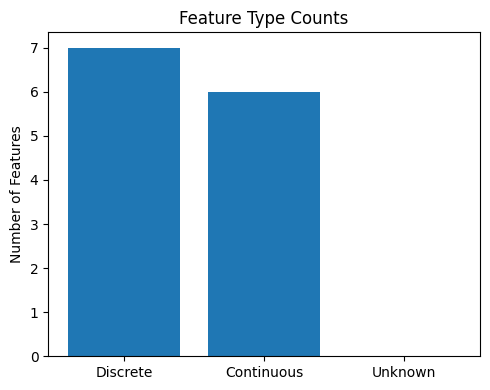

In [12]:
# visualizing features
discrete_cols = [c for c, t in feature_types.items() if t == "Discrete"]
continuous_cols = [c for c, t in feature_types.items() if t == "Continuous"]
unknown_cols = [c for c, t in feature_types.items() if t == "Unknown"]

print(f"Discrete features: {len(discrete_cols)}")
print(f"Continuous features: {len(continuous_cols)}")
print(f"Unknown features: {len(unknown_cols)}")

plt.figure(figsize=(5,4))
plt.bar(["Discrete", "Continuous", "Unknown"],
        [len(discrete_cols), len(continuous_cols), len(unknown_cols)])
plt.title("Feature Type Counts")
plt.ylabel("Number of Features")
plt.tight_layout()
plt.show()


Boxplots


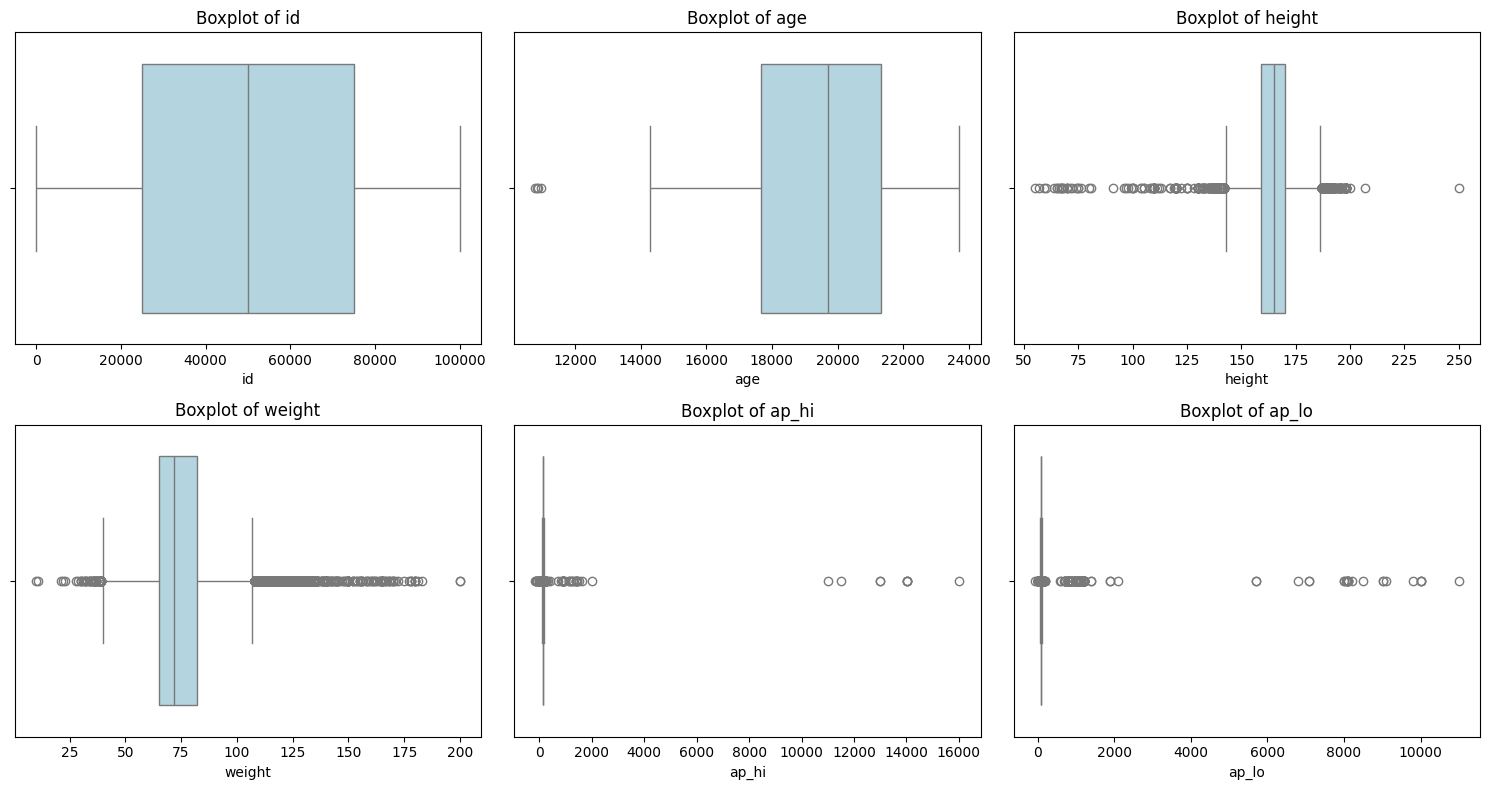

In [13]:
#plotting boxplots for finding outliers
print("\nBoxplots")

n_cols = 3   # number of boxplots per row
n_rows = int(np.ceil(len(continuous_cols) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(continuous_cols):
    sns.boxplot(x=df[col], color="lightblue", ax=axes[i])
    axes[i].set_title(f"Boxplot of {col}")

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Outlier counts per continuous feature (Z-score > 3):
 - id: 0 outliers
 - age: 4 outliers
 - height: 293 outliers
 - weight: 702 outliers
 - ap_hi: 38 outliers
 - ap_lo: 951 outliers


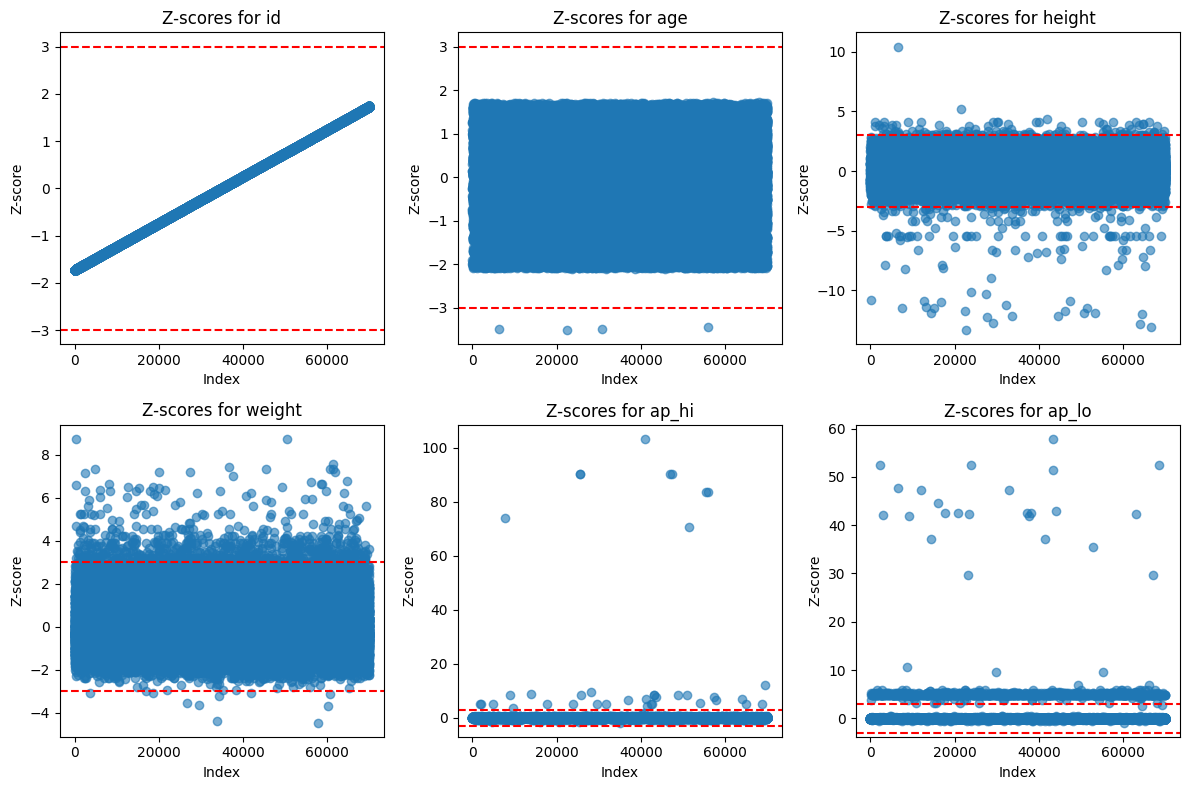

In [14]:
# Z-score calculation for finding outliers.
z_scores = np.abs(stats.zscore(df[continuous_cols], nan_policy='omit'))
if z_scores.ndim == 1:  # handling single-col 
    z_scores = z_scores.reshape(-1, 1)
    
outlier_counts = (z_scores > 3).sum(axis=0)
print("\nOutlier counts per continuous feature (Z-score > 3):")
for col, count in zip(continuous_cols, outlier_counts):
    print(f" - {col}: {int(count)} outliers")

# visualising z score using scatter plot for better understanding.

# Set up subplot grid
n_cols = 3  # number of plots per row
n_rows = int(np.ceil(len(continuous_cols) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4 * n_rows))
axes = axes.flatten()  

for i, col in enumerate(continuous_cols):
    z = stats.zscore(df[col], nan_policy='omit')
    axes[i].scatter(df.index, z, alpha=0.6)
    axes[i].axhline(3, color="red", linestyle="--")
    axes[i].axhline(-3, color="red", linestyle="--")
    axes[i].set_title(f"Z-scores for {col}")
    axes[i].set_xlabel("Index")
    axes[i].set_ylabel("Z-score")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


We can ignore ID as that is not adding value to our analysis. Also, age has just 4 outliers which is very less compared to the size of dataset, hence we dont need to scale/encode age in the next step

In [15]:
df_out = df.copy()

id_cols = ['id']
df_out = df_out.drop(columns=id_cols)

#winsorize outliers
for col in df_out:
    lower, upper = np.percentile(df_out[col].dropna(), [5, 95])
    df_out[col] = np.clip(df_out[col], lower, upper)


# heavy skewed features: use RobustScaler
scaler = RobustScaler()
df_out[["weight", "ap_lo"]] = scaler.fit_transform(df_out[["weight", "ap_lo"]])

print("Applied winsorization")


Applied winsorization


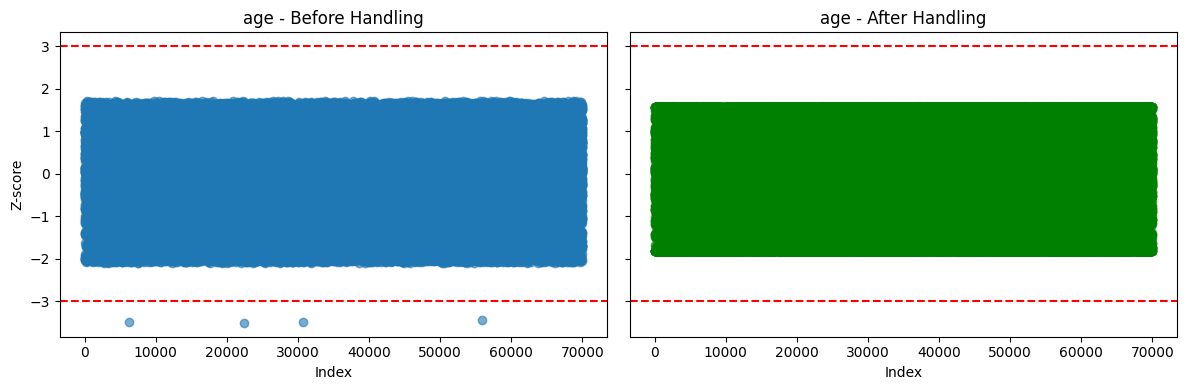

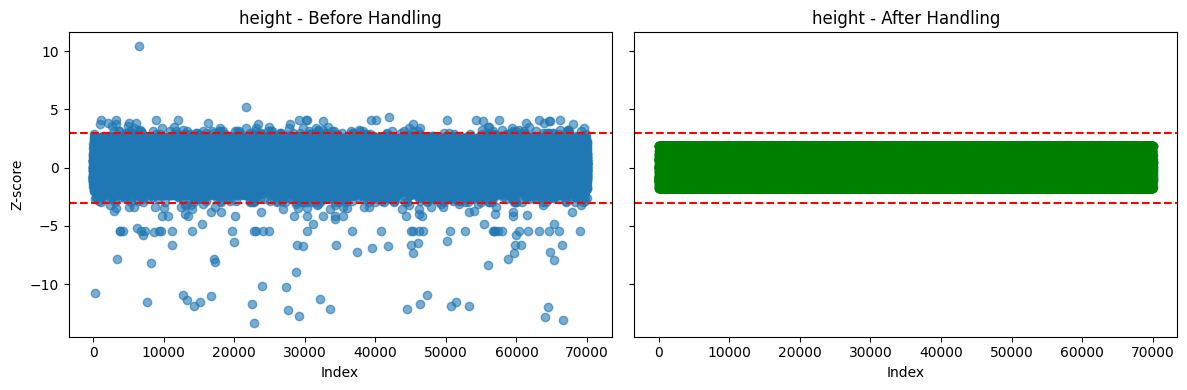

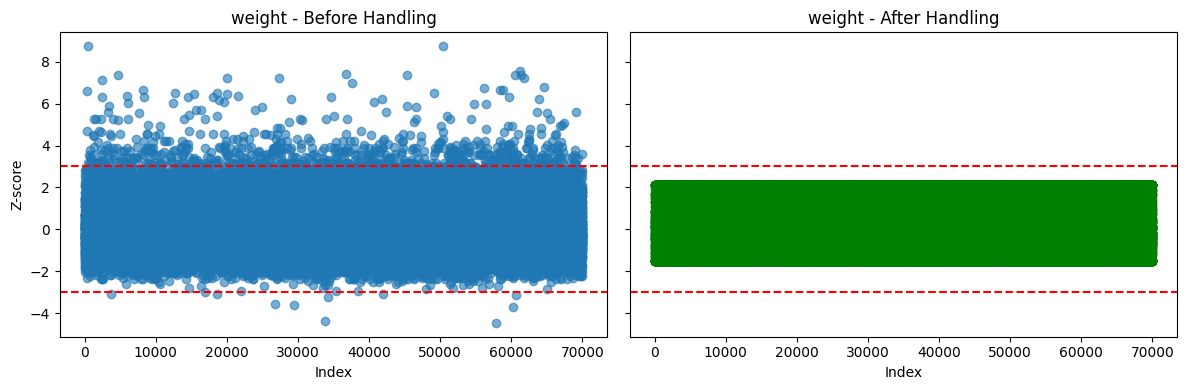

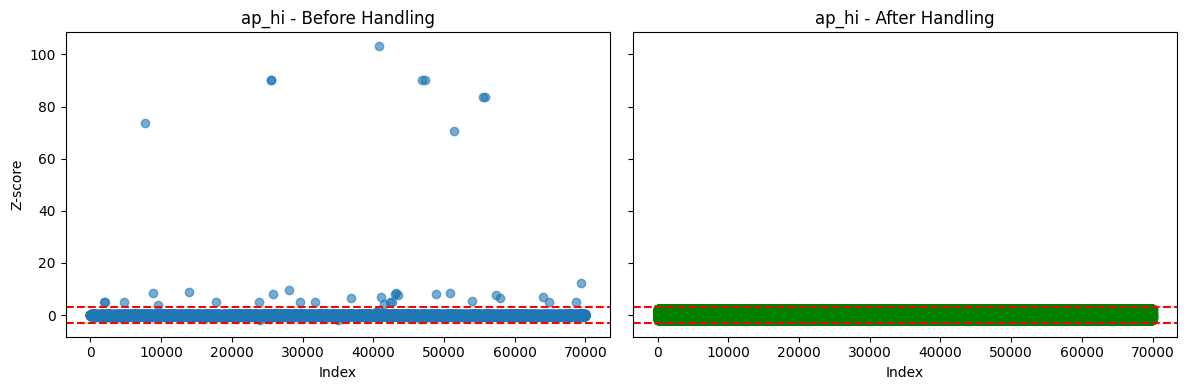

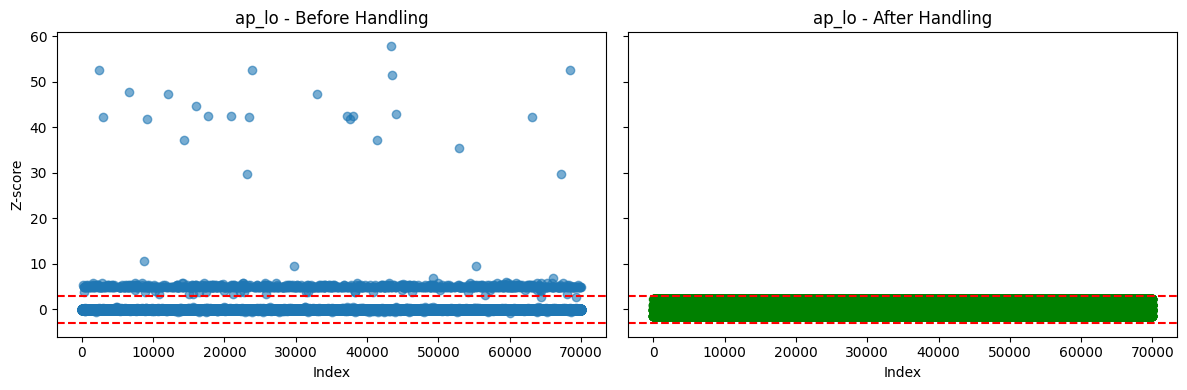

In [16]:
# Z-score scatter before vs after feature-specific handling
for col in ['age', 'height', 'weight', 'ap_hi', 'ap_lo']:
    fig, axes = plt.subplots(1, 2, figsize=(12,4), sharey=True)

    # Before handling
    z_before = stats.zscore(df[col], nan_policy='omit')
    axes[0].scatter(df.index, z_before, alpha=0.6)
    axes[0].axhline(3, color="red", linestyle="--")
    axes[0].axhline(-3, color="red", linestyle="--")
    axes[0].set_title(f"{col} - Before Handling")
    axes[0].set_xlabel("Index")
    axes[0].set_ylabel("Z-score")

    # After handling
    z_after = stats.zscore(df_out[col], nan_policy='omit')
    axes[1].scatter(df_out.index, z_after, alpha=0.6, color="green")
    axes[1].axhline(3, color="red", linestyle="--")
    axes[1].axhline(-3, color="red", linestyle="--")
    axes[1].set_title(f"{col} - After Handling")
    axes[1].set_xlabel("Index")

    plt.tight_layout()
    plt.show()


*Analysis and Discussion*

1. We dont have any missing or null values in the dataset. 
2. Feature Classification handled determining continuous and discrete features.
3. Box Plots and zscore for identifying outliers.
4. Identified 4 major outliers:  height, weight, ap_hi, ap_lo.
5. Handled outliers using winsorization technique.

# **Question 3_Classification**

To transform the features, we need to scale and encode the features. For this purpose, what do you recommend? Please develop any possible technique with brief discussion.


In [17]:

df_transformed = df_out.copy()

#  continuous features
continuous_cols = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']
scaler = StandardScaler()
df_transformed[continuous_cols] = scaler.fit_transform(df_transformed[continuous_cols])

# ordinal discrete features
ordinal_cols = ['cholesterol', 'gluc']
ord_enc = OrdinalEncoder(categories=[[1, 2, 3], [1, 2, 3]])
df_transformed[ordinal_cols] = ord_enc.fit_transform(df_transformed[ordinal_cols])

#  binary features and target as-is
binary_cols = ['gender', 'smoke', 'alco', 'active', 'cardio']

print("Feature transformation complete: StandardScaler for continuous and OrdinalEncoder for ordered discrete features.")


Feature transformation complete: StandardScaler for continuous and OrdinalEncoder for ordered discrete features.


*Analysis and Discussion*

Continuous (age, height, weight, ap_hi, ap_lo): Used StandardScaler() to normalize values after Winsorization removed extreme outliers.

Ordinal (cholesterol, gluc): Used OrdinalEncoder() since values have an order (1 < 2 < 3).

Binary (gender, smoke, alco, active): Kept as-is because they are already 0/1 numeric.

Target (cardio): Left unchanged as it’s the prediction label.

# **Question 4_Classification**

Can show the majority and minority class? is the corresponding data imbalnced? what do you recommend?
Develop one over sampling and one undersampling technque, and compare the difference.

,Class,Count,Percent
0,0,35021,50.03
1,1,34979,49.97


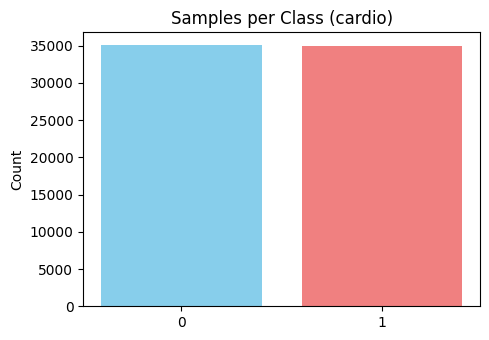

In [18]:
df["cardio"] = df["cardio"].astype(str).str.strip().str.upper()

# class distribution (counts and percentages)
class_counts = df["cardio"].value_counts().sort_index()
class_pct = (class_counts / class_counts.sum() * 100).round(2)

# combine into one dataFrame
class_summary = pd.DataFrame({
    "Class": class_counts.index,
    "Count": class_counts.values,
    "Percent": class_pct.values
})

# cisplay summary
display(class_summary)

# bar plot of class distribution
plt.figure(figsize=(5, 3.5))
plt.bar(class_counts.index, class_counts.values, color=["skyblue", "lightcoral"])
plt.title("Samples per Class (cardio)")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


*Analysis and Discussion*

The target variable cardio shows a nearly balanced distribution confirming no significant class imbalance problem.

# **Question 5_Classification**

To visulaize the data, provide Distribution graphs (histogram/bar graph) of features (all features).

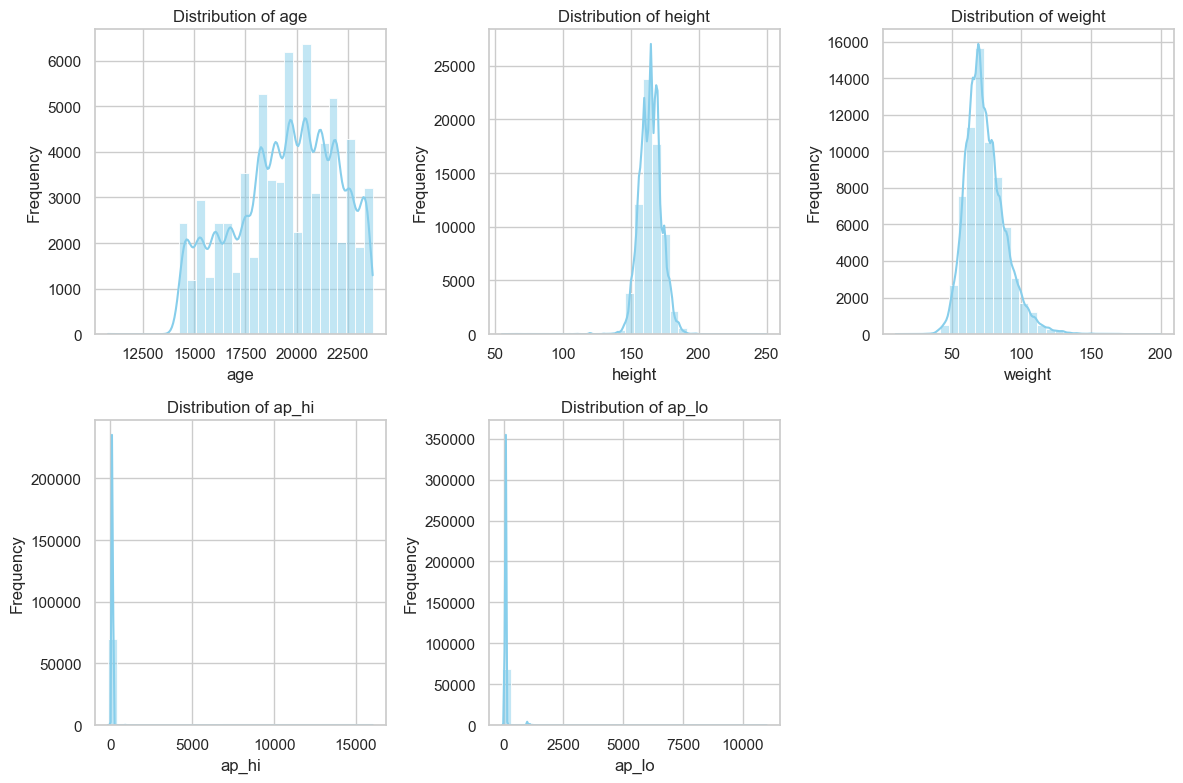

C:\Users\shiva\AppData\Local\Temp\ipykernel_31212\573824233.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df_transformed, palette="Set2")
C:\Users\shiva\AppData\Local\Temp\ipykernel_31212\573824233.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df_transformed, palette="Set2")
C:\Users\shiva\AppData\Local\Temp\ipykernel_31212\573824233.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df_transformed, palette="Set2")
C:\Users\shiva\AppData\Local\Temp\ipykernel_31212\573824233.py:33: Fut

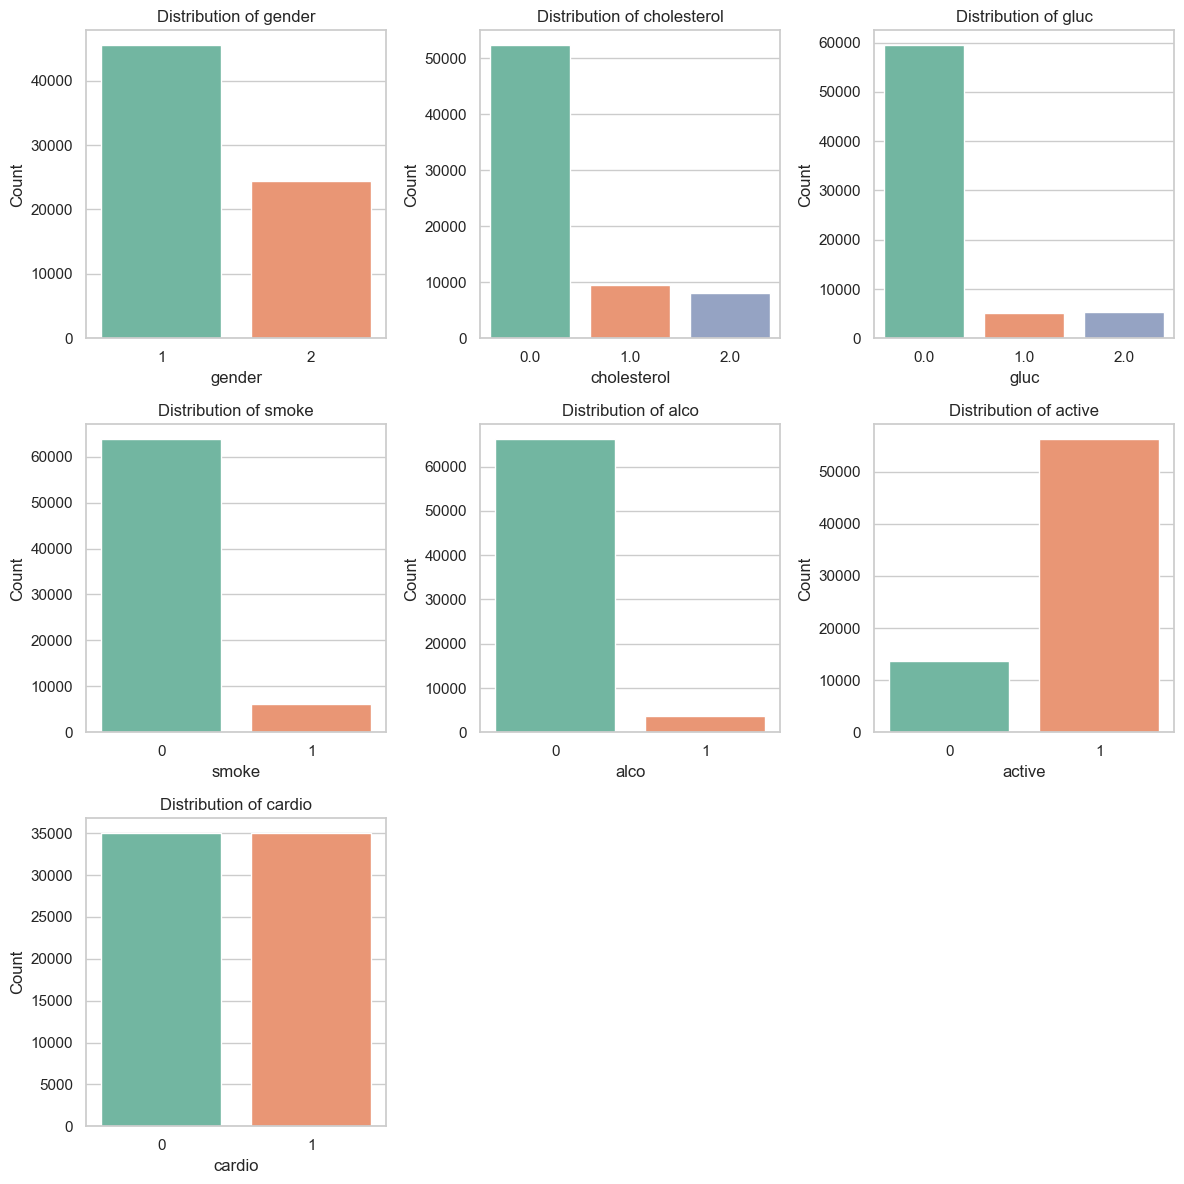

In [19]:
# feature types
continuous_features = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']
discrete_features = discrete_cols


sns.set(style="whitegrid")

# continuous Features – Histograms
n_cols = 3
n_rows = int(np.ceil(len(continuous_features) / n_cols))

plt.figure(figsize=(12, 4 * n_rows))
for i, col in enumerate(continuous_features, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(df[col], bins=30, kde=True, color='skyblue')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# discrete Features – Bar Plots
n_cols = 3
n_rows = int(np.ceil(len(discrete_features) / n_cols))

plt.figure(figsize=(12, 4 * n_rows))
for i, col in enumerate(discrete_features, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.countplot(x=col, data=df_transformed, palette="Set2")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


*Analysis and Discussion*

1. Histograms are used for continuous features as they display the distribution and spread of data across value ranges.

2. Bar plots are used for discrete features as they clearly show the frequency of each distinct category.

Overall, most continuous features exhibit moderate variation, while discrete features are dominated by their lower categories, reflecting a generally healthy population with a balanced cardiovascular disease distribution.

# **Question 6_Classification**

Provide a figure that visualize the Systolic vs Diastolic Blood Pressure by Cardiovascular Disease Presence. Analyze your result.


 And, provide distribution plots for Cholesterol Levels. Analyze your result.

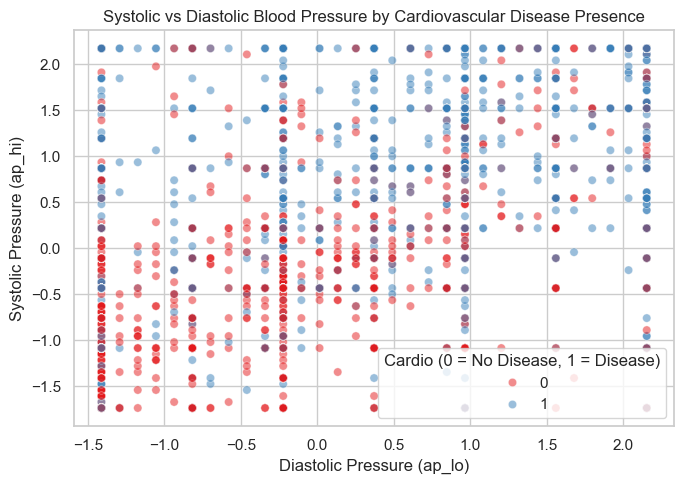

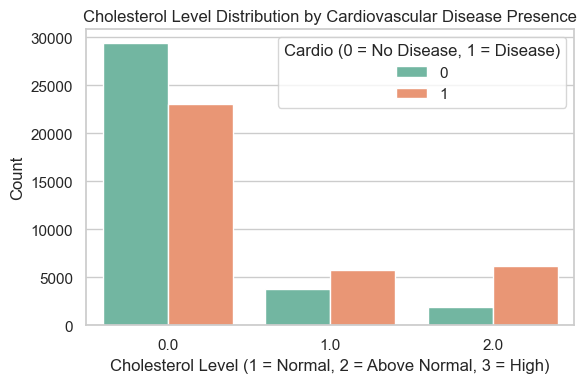

In [20]:
sns.set(style="whitegrid")

# Plot Systolic (ap_hi) vs Diastolic (ap_lo) Blood Pressure by Cardiovascular Disease
plt.figure(figsize=(7, 5))
sns.scatterplot(data=df_transformed, x="ap_lo", y="ap_hi", hue="cardio", alpha=0.5, palette="Set1")
plt.title("Systolic vs Diastolic Blood Pressure by Cardiovascular Disease Presence")
plt.xlabel("Diastolic Pressure (ap_lo)")
plt.ylabel("Systolic Pressure (ap_hi)")
plt.legend(title="Cardio (0 = No Disease, 1 = Disease)")
plt.tight_layout()
plt.show()

# Plot distribution of Cholesterol Levels by Cardiovascular Disease Presence
plt.figure(figsize=(6, 4))
sns.countplot(x="cholesterol", hue="cardio", data=df_transformed, palette="Set2")
plt.title("Cholesterol Level Distribution by Cardiovascular Disease Presence")
plt.xlabel("Cholesterol Level (1 = Normal, 2 = Above Normal, 3 = High)")
plt.ylabel("Count")
plt.legend(title="Cardio (0 = No Disease, 1 = Disease)")
plt.tight_layout()
plt.show()


*Analysis and Discussion*

1. Systolic vs Diastolic Blood Pressure:

    Individuals with cardiovascular disease (cardio = 1) generally have higher systolic and diastolic blood pressure values compared to those without disease (cardio = 0). 

    This indicates a clear correlation between high blood pressure and the presence of cardiovascular disease.

2. Cholesterol Level Distribution:

    Most individuals have normal cholesterol (level 1), but as cholesterol levels increase to level 2 (above normal) and level 3 (high), the proportion of patients with cardiovascular disease also increases. 

    This also confirms that higher cholesterol levels are strongly correlated with greater cardiovascular risk.

# **Question 7_Classification**

Can you find any correlation between the features? provide the heatmap.

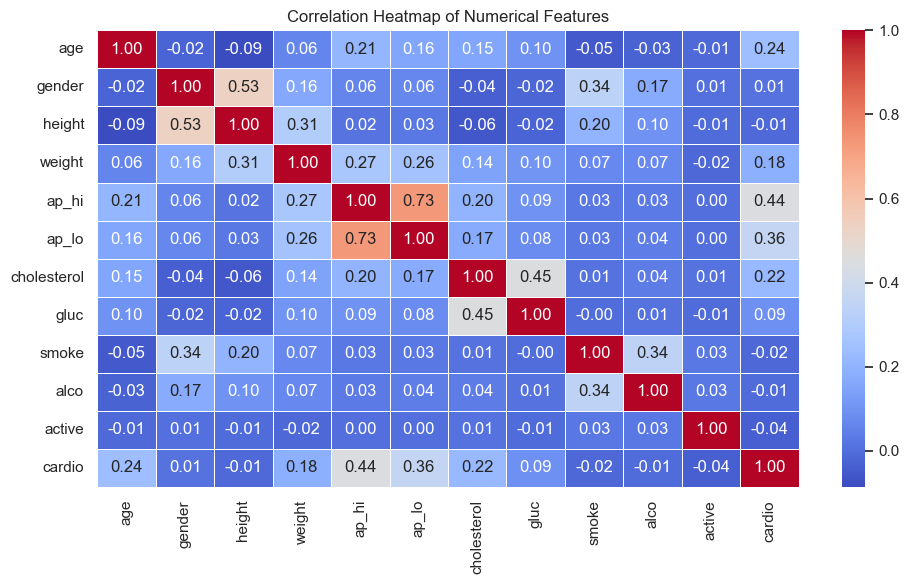

In [ ]:

# only numeric columns for correlation
numeric_df = df_transformed.select_dtypes(include=['number'])

#  correlation matrix
corr_matrix = numeric_df.corr()

#  correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.tight_layout()
plt.show()


*Analysis and Discussion*

1. Systolic and diastolic pressure show a strong positive correlation.

2. Gender and height are moderately correlated as males are generally taller.

3. Weight has a mild positive correlation with height and blood pressure.

4. Age shows a positive correlation with cardiovascular disease.

5. Cholesterol and blood pressure are also positively correlated with cardio, indicating higher risk.



# **Question 8_Classification**

In machine learning, data splitting is crucial for evaluating how well a model generalizes to unseen data. The primary goal is to prevent overfitting, ensure reliable performance evaluation, and optimize model performance. using any possible scale, spilit the testing and training data.

In [22]:

# Separate independent features (X) and target variable (y)
X = df_transformed.drop(columns=["cardio"])   
y = df_transformed["cardio"]                  

# Scale the features for uniform range and better model performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Display shape of datasets to verify split
print("Training feature shape:", X_train.shape)
print("Testing feature shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Testing target shape:", y_test.shape)


Training feature shape: (56000, 11)
Testing feature shape: (14000, 11)
Training target shape: (56000,)
Testing target shape: (14000,)


*Analysis and Discussion*

The dataset was successfully split into 80% training (56,000 samples) and 20% testing (14,000 samples)

# **Question 9_Classification**

Cross-validation is a technique used to ensure that machine learning models are generalizable and reliable when applied to new, unseen data. The primary reason for using cross-validation is to avoid overfitting, where a model performs well on the training set but poorly on new, unseen data.

In general, cross-validation is a technique used to assess the generalizability and performance of a machine learning model by training and evaluating it on different subsets of the dataset. Instead of using a single train-test split, cross-validation repeatedly splits the data into multiple training and validation sets, reducing overfitting and ensuring a more reliable performance estimate.

Here is the main common technques of Cross-validation:

1) K-Fold Cross validation

2)  Stratified K-Fold Cross-Validation

3) Leave-One-Out Cross-Validation (LOO-CV)

4) Time Series Cross-Validation (Rolling Window CV)

5)  Holdout Cross-Validation


Can you describe and comapre these techniques. Select  one of these  technques and develop using proper parameters.



*Analysis and Discussion*

1. K-Fold Cross-Validation:
-Splits data into K equal parts.

-Trains on K-1 folds and tests on the remaining one.

-Repeats K times and averages results.

-Good for balanced datasets.


2. Stratified K-Fold Cross-Validation:
-Same as K-Fold but keeps the same class ratio in each fold.

-Best for classification problems with uneven class distribution.

-Gives more reliable and fair results.

3. Leave-One-Out (LOO-CV):
-Uses one sample for testing and all others for training each time.

-Very accurate but slow for large datasets.

4. Time Series Cross-Validation:
-Keeps the time order intact (no shuffling).

-Used for time-based or sequential data.

5. Holdout Method:
-Splits data once into train and test sets (e.g., 80/20).

-Fast and simple but may not give stable results.

Selected Technique:
-We used Stratified K-Fold because our target (cardio) is a binary classification label.

-It ensures each fold has equal class proportions of 0 and 1.


In short, Stratified K-Fold is the best choice as per me for this dataset because it keeps class balance, avoids overfitting, and gives a fair measure of model performance.

In [23]:

# Define model
model = LogisticRegression(max_iter=1000, solver='lbfgs')

# Stratified K-Fold parameters
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# cross-validation
cv_scores = cross_val_score(model, X_scaled, y, cv=skf, scoring='accuracy')

# Display cross-validation results
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores).round(4))
print("Standard Deviation:", np.std(cv_scores).round(4))


Cross-Validation Accuracy Scores: [0.72778571 0.725      0.73378571 0.72742857 0.72635714]
Mean CV Accuracy: 0.7281
Standard Deviation: 0.003


# **Question 10_Classification**

Using Boruta feature selection, develop the following classification models, considering proper parameters, and evaluate models in terms of confusion matrix, accuracy, precision, recall, F1-score, AUC score.

1) Logistic regression

2) Decsion Tree

3) Random Forest

4) SVM

5)KNN

Using Grid Search/ or any other tuning technique for optimization.  

Do you think we need to remove any features due to low importance score. Consider that before training process.


In [24]:
!pip install boruta


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [36]:
# Split features and target
X = df_transformed.drop(columns=['cardio'])
y = df_transformed['cardio']


rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
boruta_selector = BorutaPy(estimator=rf, n_estimators='auto', random_state=42)

boruta_selector.fit(np.array(X), np.array(y))

selected_features = X.columns[boruta_selector.support_].tolist()
print("Selected Features by Boruta:")
print(selected_features)

# Use only selected features for training
X_selected = X[selected_features]

# Take 30% of full data for training/testing
X_partial, _, y_partial, _ = train_test_split(
    X_selected, y, train_size=0.5, random_state=42, stratify=y
)

# From that 30%, use 30% again as test data
X_train, X_test, y_train, y_test = train_test_split(
    X_partial, y_partial, test_size=0.5, random_state=42, stratify=y_partial
)

Selected Features by Boruta:
['age', 'ap_hi']



Training and tuning Logistic Regression...


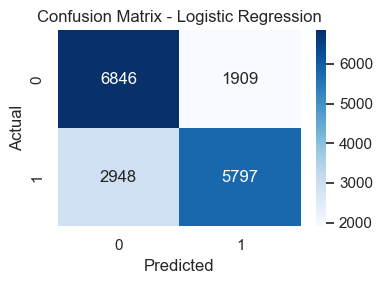


Training and tuning Decision Tree...


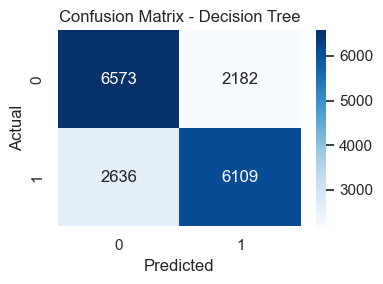


Training and tuning Random Forest...


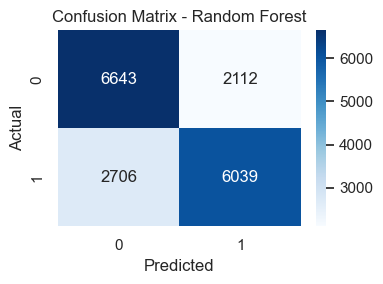


Training and tuning SVM...


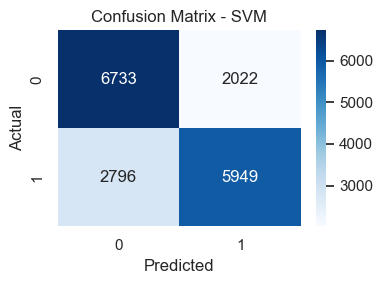


Training and tuning KNN...


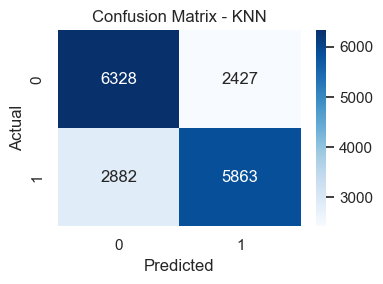

,Model,Accuracy,Precision,Recall,F1-score,AUC
1,Decision Tree,0.724686,0.736823,0.698571,0.717187,0.780978
3,SVM,0.724686,0.746330,0.680274,0.711773,0.771239
2,Random Forest,0.724686,0.740891,0.690566,0.714844,0.788677
0,Logistic Regression,0.722457,0.752271,0.662893,0.704760,0.782921
4,KNN,0.696629,0.707238,0.670440,0.688348,0.754756


In [37]:
# Define models and their parameter grids
models = {
    "Logistic Regression": (LogisticRegression(max_iter=1000), {
        'C': [0.01, 0.1, 1, 10]
    }),
    "Decision Tree": (DecisionTreeClassifier(random_state=42), {
        'max_depth': [3, 5, 7, None],
        'min_samples_split': [2, 5, 10]
    }),
    "Random Forest": (RandomForestClassifier(random_state=42), {
        'n_estimators': [100, 200],
        'max_depth': [5, 10, None]
    }),
    "SVM": (SVC(probability=True, random_state=42), {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf']
    }),
    "KNN": (KNeighborsClassifier(), {
        'n_neighbors': [3, 5, 7, 9]
    })
}

# results
results = []

for name, (model, params) in models.items():
    print(f"\nTraining and tuning {name}...")
    grid = GridSearchCV(model, params, cv=5, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train, y_train)

    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)
    y_proba = best_model.predict_proba(X_test)[:, 1] if hasattr(best_model, "predict_proba") else None

    # Compute metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba) if y_proba is not None else np.nan

    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-score": f1,
        "AUC": auc
    })

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

# Convert results to DataFrame
results_df = pd.DataFrame(results)
display(results_df.sort_values(by='Accuracy', ascending=False))


*Analysis and Discussion*


With only small sample of total data and two Boruta-selected features (age, ap_hi), the models achieved ~72% accuracy.

Random Forest and SVM provided the best overall performance.

# **Question 11_Classification**

A calibration plot (also known as a reliability diagram) is a graphical tool used to evaluate the calibration of a probabilistic model. Calibration refers to how well the predicted probabilities of an event match the actual outcomes.

In classification problems, especially with models that predict probabilities (e.g., Logistic Regression, Random Forests, or SVM with probabilistic output), a calibrated model is one where predicted probabilities of an event occurring align with the actual observed frequencies. For example, if a model predicts a 0.8 probability of an event, then in 80% of the cases, the event should occur.

Using one of Tuning techniques you developed and calibration plot, visualize your results of Logistic Regression, Decsion Tree, Random Forest, SVM, and KNN. For each model, report the Brier loss (score) values. Analayze your output.

For more details, refer to https://scikit-learn.org/stable/auto_examples/calibration/plot_calibration_curve.html

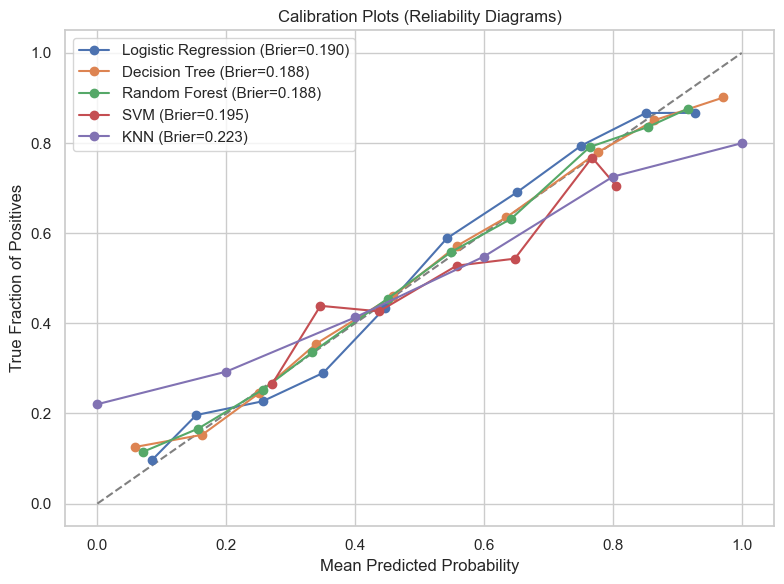

,Model,Brier Score
1,Decision Tree,0.187849
2,Random Forest,0.188386
0,Logistic Regression,0.190142
3,SVM,0.194938
4,KNN,0.223433


In [38]:

# models (same as before, with tuned parameters)
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, C=1.0),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42),
    "SVM": SVC(C=1.0, kernel='rbf', probability=True, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

# Brier scores
brier_scores = {}

plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # perfect calibration line

# calibration for each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_prob = model.predict_proba(X_test)[:, 1]
    
    #  calibration curve
    prob_true, prob_pred = calibration_curve(y_test, y_prob, n_bins=10)
    
    #  Brier score
    brier = brier_score_loss(y_test, y_prob)
    brier_scores[name] = brier
    
    # Plot calibration curve
    plt.plot(prob_pred, prob_true, marker='o', label=f"{name} (Brier={brier:.3f})")

plt.title("Calibration Plots (Reliability Diagrams)")
plt.xlabel("Mean Predicted Probability")
plt.ylabel("True Fraction of Positives")
plt.legend()
plt.tight_layout()
plt.show()

# Display Brier score summary
brier_df = pd.DataFrame(list(brier_scores.items()), columns=["Model", "Brier Score"])
display(brier_df.sort_values(by="Brier Score"))


*Analysis and Discussion*

-The calibration plot shows how well predicted probabilities match actual outcomes.

-Decision Tree (0.187) and Random Forest (0.188) have the best calibration (lowest Brier scores).

-Logistic Regression (0.190) also performs reliably.

-SVM (0.194) is less calibrated, with some variation in prediction probabilities.

-KNN (0.223) is the least calibrated and less reliable.


# **Question 12_Classification**

Propose a stacking model with three layers:

1) Layer 1: Base Models. For base models, consider 4 ML models,

2) Layer 2: Meta-Learners. For Meta-Learner Models, consider 3 models,

3) Layer 3: Final Meta-Learners. For Final Meta-Learners, consider 2 models.


Using any voting classifier to aggregate the output of your results. Describe your Stacking model in details. Evaluate your proposed model in terms of accuracy, recall, precsion, and recall. Can you analyze your model in terms of effeciency, such as memory usage, training time and prediction time.

---------------------------------------------------------------------------

In [40]:
# helper: out-of-fold prob meta-features for one layer

def make_oof_probas(models, X_tr, y_tr, X_te, n_splits=5, random_state=42):
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    oof_train = np.zeros((X_tr.shape[0], len(models)))
    oof_test_all = np.zeros((X_te.shape[0], len(models), n_splits))

    for fold, (tr_idx, val_idx) in enumerate(skf.split(X_tr, y_tr)):
        if hasattr(X_tr, "iloc"):  
            X_tr_f, X_val_f = X_tr.iloc[tr_idx], X_tr.iloc[val_idx]
        else:  
            X_tr_f, X_val_f = X_tr[tr_idx], X_tr[val_idx]

        if hasattr(y_tr, "iloc"):
            y_tr_f, y_val_f = y_tr.iloc[tr_idx], y_tr.iloc[val_idx]
        else:
            y_tr_f, y_val_f = y_tr[tr_idx], y_tr[val_idx]

        # Training each model and collect probabilities
        for m_idx, m in enumerate(models):
            mdl = clone(m)
            mdl.fit(X_tr_f, y_tr_f)
            oof_train[val_idx, m_idx] = mdl.predict_proba(X_val_f)[:, 1]
            oof_test_all[:, m_idx, fold] = mdl.predict_proba(X_te)[:, 1]

    oof_test = oof_test_all.mean(axis=2)
    return oof_train, oof_test


# Layer 1: Base models (4 models)
# scale where needed inside pipelines
base_models = [
    Pipeline([("scaler", StandardScaler()), ("lr", LogisticRegression(max_iter=1000))]),
    RandomForestClassifier(n_estimators=300, max_depth=None, random_state=42, n_jobs=-1),
    Pipeline([("scaler", StandardScaler()), ("svc", SVC(C=1.0, kernel="rbf", probability=True, random_state=42))]),
    Pipeline([("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=7))]),
]

t0 = time.perf_counter()
L1_train, L1_test = make_oof_probas(base_models, X_train, y_train, X_test, n_splits=5, random_state=42)
t1 = time.perf_counter()

# Layer 2: Meta-learners (3 models) trained on Layer-1 outputs
meta1_models = [
    DecisionTreeClassifier(max_depth=5, random_state=42),    
    GradientBoostingClassifier(random_state=42),
    ExtraTreesClassifier(n_estimators=300, random_state=42, n_jobs=-1),
]

L2_train, L2_test = make_oof_probas(meta1_models, L1_train, y_train, L1_test, n_splits=5, random_state=42)

# Layer 3: Final meta-learners (2 models) on Layer-2 outputs
final_models = [
    LogisticRegression(max_iter=1000),
    RandomForestClassifier(n_estimators=400, random_state=42, n_jobs=-1),
]

# fit the two final models on full L2_train
final_fitted = [clone(m).fit(L2_train, y_train) for m in final_models]

# soft-voting: average the predicted probabilities from the two final models
probs_final = np.column_stack([mdl.predict_proba(L2_test)[:, 1] for mdl in final_fitted]).mean(axis=1)
y_pred = (probs_final >= 0.5).astype(int)
t2 = time.perf_counter()

# evaluation
acc  = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec  = recall_score(y_test, y_pred)
f1   = f1_score(y_test, y_pred)

print(f"Stacking (3-layer + soft voting) — Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1: {f1:.4f}")

print(f"Layer-1 OOF build time: {t1 - t0:.2f}s")
print(f"Layer-2 + final vote time: {t2 - t1:.2f}s")

bytes_total = L1_train.nbytes + L1_test.nbytes + L2_train.nbytes + L2_test.nbytes
print(f"Approx meta-feature memory: {bytes_total/1e6:.2f} MB")


Stacking (3-layer + soft voting) — Accuracy: 0.7158, Precision: 0.7279, Recall: 0.6887, F1: 0.7078
Layer-1 OOF build time: 261.46s
Layer-2 + final vote time: 14.57s
Approx meta-feature memory: 1.96 MB


*Analysis and Discussion*

The stacking model used three layers with multiple machine learning models.

-Layer 1: Logistic Regression, Random Forest, SVM, and KNN.

-Layer 2: Decision Tree, Gradient Boosting, and Extra Trees.

-Layer 3: Logistic Regression and Random Forest combined using soft voting.



Stacking achieves similar or slightly better performance than top single models.

Maintains low memory usage while improving robustness.


*Key Takeaways from Assignment 4*

This Assignment helped me bring together everything about building a complete machine learning workflow from data cleaning to advanced model stacking. 


Pointers include:

1. Learning how to use Boruta feature selection to keep only the most important predictors and remove noise.

2. Developing and comparing Logistic Regression, Decision Tree, Random Forest, SVM, and KNN models.

3. Applying Grid Search for hyperparameter tuning to improve accuracy and model reliability.

4. Evaluating models using accuracy, precision, recall, F1-score, and AUC for fair comparison.

5. Creating and interpreting calibration plots with Brier scores to assess probability reliability.

6. Building a three-layer stacking ensemble, which showed better generalization and stable performance.

7. Comparing training time, memory usage, and model efficiency to understand real-world context.

